# ROC Curve and AUC

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at different classification thresholds. 

The Curve plots the True Positive Rate (TPR) on the y-axis and False Positive Rate (FPR) on the x-axis:

\begin{align}
        True Positive Rate = \frac{TP}{TP+FN}
    \end{align}


\begin{align}
        False Positive Rate = \frac{FP}{FP+TN}
    \end{align}

The TPR and FPR are evaluated at different decision threholds, lowering the threshold causes the model to identify more items as possitive, and increases both False Positives and True Positives. A typical ROC curve is shown below: 

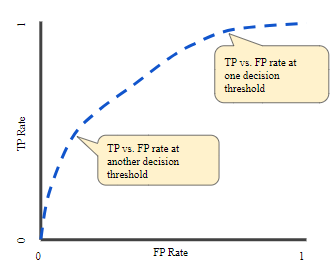

Let's construct an ROC curve manually. 

In [118]:
import numpy as np
def true_positive(y_pred:np.array, y_true:np.array):
  return ((y_true==1) &(y_pred==1)).sum()
def false_positive(y_pred:np.array, y_true:np.array):
  return ((y_true == 0) & (y_pred == 1)).sum()
def true_negative(y_pred:np.array, y_true:np.array):
  return ((y_true == 0) & (y_pred == 0)).sum()
def false_negative(y_pred:np.array, y_true:np.array):
  return ((y_true == 1) & (y_pred == 0)).sum()

def false_positive_rate(false_positives:np.array, true_negatives:np.array) -> float:
    return (false_positives/(false_positives+true_negatives))

def true_positive_rate(true_positives:np.array, false_negatives:np.array) -> float:
    return (true_positives/(true_positives+false_negatives))

In [119]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100, n_informative=2, flip_y=0.25, random_state=42)


# Helper funcs
def get_prediction(proba_arr:np.array) -> int:
  if proba_arr[0] == 0:
    return 1
  return 0

def get_predictions_for_threshold(X:np.array,y:np.array, threshold:int) -> np.array:
  """
  returns predictions for a given threshold value (0 - 1)
  """
  clf.fit(X,y)
  decisions = (clf.predict_proba(X) >= threshold).astype(int)
  predictions = np.array([get_prediction(x) for x in decisions])
  return predictions

In [120]:
thresholds = np.arange(1e-3,1, 0.01)
len(thresholds)

100

In [121]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty = None)

preds_dict = {}
for i in thresholds:
    preds_dict[i] = get_predictions_for_threshold(X,y, i)

In [122]:
FPR = []
TPR = []

for k,v  in preds_dict.items():
    tp = true_positive(v, y)
    tn = true_negative(v, y)
    fp = false_positive(v, y)
    fn = false_negative(v, y)
    FPR.append(false_positive_rate(fp, tn))
    TPR.append(true_positive_rate(tp,fn))

In [123]:
threshold_locs = dict.fromkeys(np.round(thresholds,1),list(zip(FPR, TPR)))
threshold_locs[0.0][1]

(0.0, 0.52)

Text(0.5, 1.0, 'ROC Curve with Thresholds')

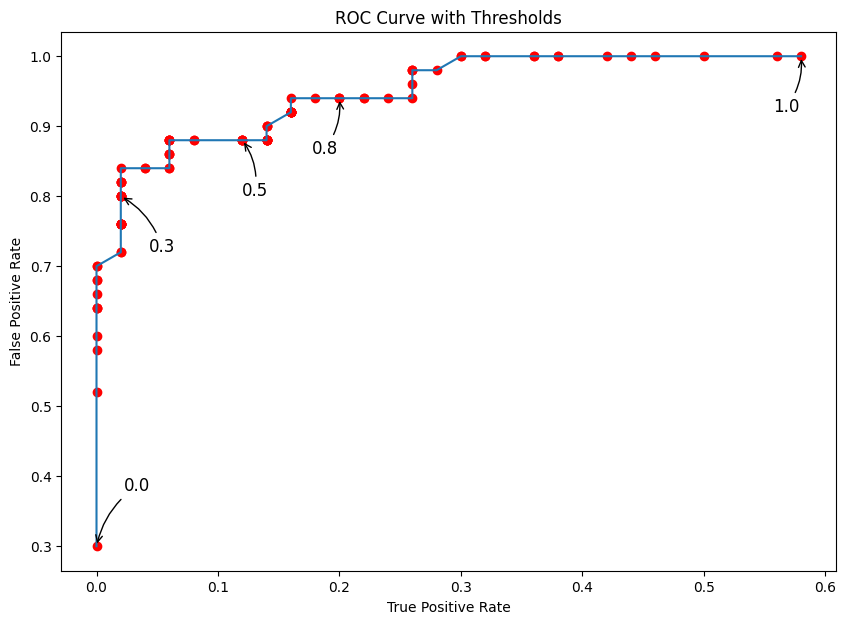

In [124]:
import matplotlib.pyplot as plt
plt.style.use('default')
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(FPR, TPR)
ax.set_ylabel("False Positive Rate")
ax.set_xlabel("True Positive Rate")

## Adding threshold locations

ax.scatter(FPR, TPR, c = 'r', )
delta = 0.01

i = 0
ax.annotate(np.round(thresholds[i],1),
            xy=(FPR[i], TPR[i]), 
            xycoords='data',
            xytext=(20, 40), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc3,rad=.2"),
            fontsize=12)

i = 25
ax.annotate(np.round(thresholds[i],1),
            xy=(FPR[i], TPR[i]), 
            xycoords='data',
            xytext=(20, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc3,rad=.2"),
            fontsize=12)

i = 50
ax.annotate(np.round(thresholds[i],1),
            xy=(FPR[i], TPR[i]), 
            xycoords='data',
            xytext=(0, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc3,rad=.2"),
            fontsize=12)


i = 75
ax.annotate(np.round(thresholds[i],1),
            xy=(FPR[i], TPR[i]), 
            xycoords='data',
            xytext=(-20, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc3,rad=.2"),
            fontsize=12)

i = 99
ax.annotate(np.round(thresholds[i],1),
            xy=(FPR[i], TPR[i]), 
            xycoords='data',
            xytext=(-20, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc3,rad=.2"),
            fontsize=12)

ax.set_title("ROC Curve with Thresholds")

The ROC Curve gives an intuition of how well an algorithm is performing, but it's always nice to have a single value to compare different models. Luckily we have the AUc (Area under the curve), like the name suggests this value sums up the area under the ROC Curve, with a value of 1 being a perfect classifier, a value of 0.5 corresponding to a completely random classifier, and a value of 0 corresponds to an algorithm whos predictions are 100% wrong. 

## Test Question

A friend makes a classification algorithm for identifying whether a person's favourite
hot drink is coffee. Their algorithm associates a score to each person, higher scores
intending to represent a higher chance of preferring coffee. They tell you that they
have tested their algorithm on seven people with results:

\begin{array}{|c|c|}
\hline
\text{Score} & \text{Favourite Drink} \\
\hline
0.1 & \text{Coffee} \\
0.15 & \text{Tea} \\
0.2 & \text{Coffee} \\
0.25 & \text{Tea} \\
0.3 & \text{Coffee} \\
0.8 & \text{Tea} \\
0.9 & \text{Coffee} \\
\hline
\end{array}


You construct an ROC curve using this data to see the performance of your friend's
algorithm. You find the area under the curve A. Which of the following is closest
to A? [2]

\begin{align*}
\bullet & \, 0 \\
\bullet & \, 0.25 \\
\bullet & \, 0.5 \\
\bullet & \, 0.75 \\
\bullet & \, 0.95 \\
\end{align*}


Since we are predicting coffee drinkers, we will denote a coffee response as a "positive". 

The approach is to adjust the threshold value, filter the dataframe for values where the score is greater than or equal to the threshold and count the number of coffee drinkers (True positives) vs tea drinkers (false positives). 
The TPR and FPR can then be calculated and the ROC curve plotted, and AUC Calculated. 

In [125]:
import pandas as pd 

df = pd.DataFrame({"Score":[0.1,0.15,0.2,0.25,0.3,0.8,0.9], 
                   "Drink":["Coffee", "Tea", "Coffee", "Tea", "Coffee", "Tea", "Coffee"]})
df['pos_neg'] = df['Drink'].map({"Coffee":1, "Tea":0})
df

,Score,Drink,pos_neg
0,0.10,Coffee,1
1,0.15,Tea,0
2,0.20,Coffee,1
3,0.25,Tea,0
4,0.30,Coffee,1
5,0.80,Tea,0
6,0.90,Coffee,1


In [126]:
thresholds = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
FPR = []
TPR = []
coffee_count = df['Drink'].value_counts()['Coffee']
tea_count = df['Drink'].value_counts()['Tea']

for i in thresholds:
    df_thresh = df[df['Score']>=i]
    try:
        tp = df_thresh['Drink'].value_counts()['Coffee']
    except KeyError:
        tp = 0
    try:
        fp = df_thresh['Drink'].value_counts()['Tea']
    except KeyError:
        fp = 0
    FPR.append(fp/tea_count)
    TPR.append(tp/coffee_count)

Text(0.5, 0, 'True Positive Rate')

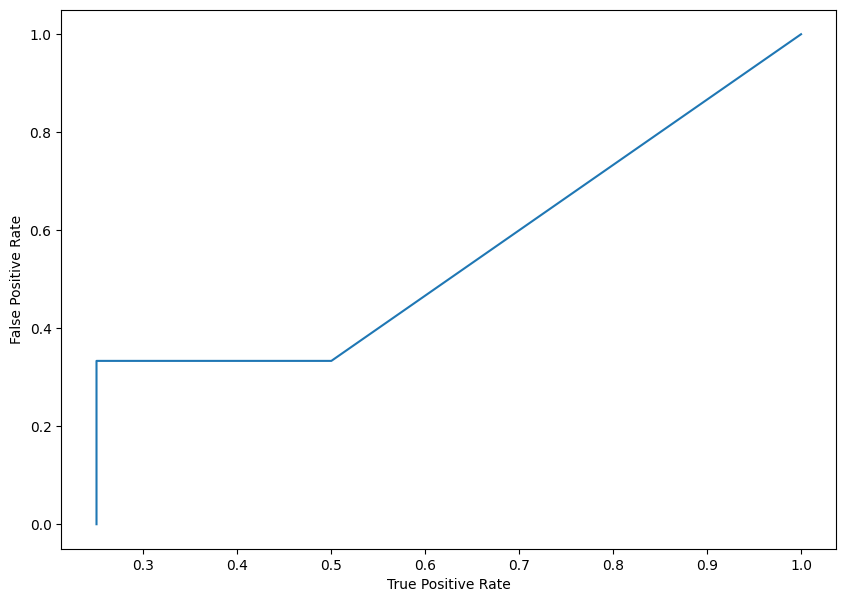

In [127]:
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(TPR, FPR)
ax.set_ylabel("False Positive Rate")
ax.set_xlabel("True Positive Rate")

In [128]:
from sklearn.metrics import auc
auc(TPR, FPR)

0.41666666666666663